In [2]:
# leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv", row.names = 1)
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_Storey.csv", row.names = 1)
head(leads,2)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


In [3]:
gtex_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/mean_eqtl/"
head(list.files(gtex_folder))

[1] "adipose_subcutaneous_parsed_topsnp_allgenes_jan16.tsv"
[2] "adipose_visceral_parsed_topsnp_allgenes_jan16.tsv"    
[3] "adrenal_gland_parsed_topsnp_allgenes_jan16.tsv"       
[4] "artery_aorta_parsed_topsnp_allgenes_jan16.tsv"        
[5] "artery_coronary_parsed_topsnp_allgenes_jan16.tsv"     
[6] "artery_tibial_parsed_topsnp_allgenes_jan16.tsv"

In [4]:
myfiles = list.files(gtex_folder,".tsv")
tissues = gsub("_parsed_topsnp_allgenes_jan16.tsv","",myfiles)
head(tissues)

[1] "adipose_subcutaneous" "adipose_visceral"     "adrenal_gland"       
[4] "artery_aorta"         "artery_coronary"      "artery_tibial"

In [5]:
tissues[1]

[1] "adipose_subcutaneous"

In [6]:
res = list()
for (i in 1:length(myfiles)){
#     print(i)
    mysuffix = myfiles[i]
    myfilename = paste0(gtex_folder, mysuffix)
    myfile = read.table(myfilename, row.names = 1)
    colnames(myfile) <- c("feature_id","snp_id","p_value","beta")
    res[[tissues[i]]] = myfile    
}

In [7]:
tissues

[1] "adipose_subcutaneous"                                           
 [2] "adipose_visceral"                                               
 [3] "adrenal_gland"                                                  
 [4] "artery_aorta"                                                   
 [5] "artery_coronary"                                                
 [6] "artery_tibial"                                                  
 [7] "blood"                                                          
 [8] "brain_amygdala_topsnp_allgenes_jan16.tsv"                       
 [9] "brain_anterior_cingulate_cortex_topsnp_allgenes_jan16.tsv"      
[10] "brain_caudate_basal_ganglia_topsnp_allgenes_jan16.tsv"          
[11] "brain_cerebellar_hemisphere_topsnp_allgenes_jan16.tsv"          
[12] "brain_frontal_cortex_topsnp_allgenes_jan16.tsv"                 
[13] "brain_hypothalamus_topsnp_allgenes_jan16.tsv"                   
[14] "brain_nucleus_accumbens_basal_ganglia_topsnp_allgenes_jan16.tsv"
[15] "brain"                                                          
[16] "brain_putamen_basal_ganglia_topsnp_allgenes_jan16.tsv"          
[17] "brain_spinal_topsnp_allgenes_jan16.tsv"                         
[18] "breast_topsnp_allgenes_jan16.tsv"                               
[19] "colon_sigmoid_topsnp_allgenes_jan16.tsv"                        
[20] "colon_transverse_topsnp_allgenes_jan16.tsv"                     
[21] "cortex"                                                         
[22] "esophagus_mucosa_topsnp_allgenes_jan16.tsv"                     
[23] "esophagus_muscularis_topsnp_allgenes_jan16.tsv"                 
[24] "esophagus_topsnp_allgenes_jan16.tsv"                            
[25] "heart_atrial_topsnp_allgenes_jan16.tsv"                         
[26] "heart"                                                          
[27] "hippocampus"                                                    
[28] "liver"                                                          
[29] "lung_topsnp_allgenes_jan16.tsv"                                 
[30] "muscle"                                                         
[31] "nerve_tibial_topsnp_allgenes_jan16.tsv"                         
[32] "ovary_topsnp_allgenes_jan16.tsv"                                
[33] "pancreas"                                                       
[34] "pituitary_topsnp_allgenes_jan16.tsv"                            
[35] "prostate_topsnp_allgenes_jan16.tsv"                             
[36] "salivary_gland_topsnp_allgenes_jan16.tsv"                       
[37] "skin_nosun_topsnp_allgenes_jan16.tsv"                           
[38] "skin_sun"                                                       
[39] "small_intestine_topsnp_allgenes_jan16.tsv"                      
[40] "spleen_topsnp_allgenes_jan16.tsv"                               
[41] "stomach_topsnp_allgenes_jan16.tsv"                              
[42] "substantia_nigra"                                               
[43] "testis_topsnp_allgenes_jan16.tsv"                               
[44] "thyroid_topsnp_allgenes_jan16.tsv"                              
[45] "transf_fibroblasts"                                             
[46] "transf_lymphocytes_topsnp_allgenes_jan16.tsv"                   
[47] "uterus_topsnp_allgenes_jan16.tsv"                               
[48] "vagina_topsnp_allgenes_jan16.tsv"

In [8]:
brain_tissues = unique(c(tissues[grep("brain",tissues)],tissues[grep("cortex",tissues)],
                         tissues[grep("hippocampus",tissues)],tissues[grep("substantia_nigra",tissues)]))
length(brain_tissues)
# brain_tissues

[1] 13

In [13]:
celltypes = unique(leads$label)
mat = matrix(0,nrow = length(brain_tissues),ncol = length(celltypes))

In [14]:
celltypes

[1] FPP_D11       P_FPP_D11     FPP_D30       DA_D30        Sert_D30     
 [6] Epen1_D30     DA_D52        Sert_D52      Epen1_D52     Astro_D52    
[11] DA_D52_ROT    Sert_D52_ROT  Epen1_D52_ROT Astro_D52_ROT
14 Levels: Astro_D52 Astro_D52_ROT DA_D30 DA_D52 DA_D52_ROT ... Sert_D52_ROT

In [15]:
library(dplyr)

In [16]:
for (j in 1:length(celltypes)){
# for (j in 1){
    celltype = as.character(celltypes[j])
#     print(celltype)
    l = leads[leads$label == celltype,]
    for (i in 1:length(brain_tissues)){
#     for (i in 1){
        t = brain_tissues[i]
#         print(t)
        r = res[[t]]
        df = inner_join(l,r,by = c("snp_id","feature_id"), suffix = c("",".gtex"))
#         print(nrow(df))
        mat[i,j] = nrow(df[df$p_value.gtex < 0.05,])/nrow(df)
#         print(mat[i,j])
    }
}

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with differe

“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coerci

“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coerci

“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coerci

“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coerci

In [17]:
mat

0.3231707,0.3320312,0.5403226,0.4274809,0.4757282,0.4600000,0.4532374,0.5163043,0.4655172,0.76,0.5901639,0.5511811,0.4888889,0.7916667
0.3556911,0.3847656,0.5564516,0.5114504,0.5048544,0.5000000,0.5035971,0.5326087,0.5229885,0.80,0.6229508,0.5905512,0.5588235,0.7500000
0.4134420,0.4511719,0.6290323,0.5496183,0.5436893,0.5266667,0.5683453,0.5434783,0.5953757,0.76,0.6065574,0.6220472,0.6250000,0.7083333
0.4346939,0.4755382,0.5725806,0.5378788,0.5825243,0.5200000,0.5971223,0.5409836,0.5632184,0.84,0.7213115,0.6320000,0.5074627,0.7500000
0.3963415,0.4316406,0.5806452,0.5954198,0.5339806,0.5200000,0.5683453,0.5760870,0.5287356,0.72,0.6885246,0.6062992,0.5735294,0.7500000
0.3475610,0.3632812,0.5483871,0.4696970,0.4660194,0.4133333,0.5107914,0.5271739,0.4800000,0.76,0.6065574,0.5590551,0.5401460,0.6666667
0.4012220,0.4238281,0.6451613,0.5572519,0.5339806,0.5333333,0.5683453,0.5271739,0.5606936,0.84,0.6557377,0.5905512,0.5882353,0.7500000
0.4765784,0.5088063,0.6370968,0.6287879,0.5825243,0.5466667,0.6330935,0.5792350,0.6091954,0.76,0.6721311,0.6080000,0.6417910,0.7500000
0.3991853,0.4160156,0.6129032,0.5038168,0.4757282,0.4533333,0.5467626,0.5434783,0.5664740,0.76,0.6557377,0.5669291,0.5555556,0.6666667
0.3069106,0.3496094,0.5241935,0.4274809,0.4271845,0.4400000,0.4604317,0.5108696,0.5028902,0.72,0.5573770,0.4803150,0.5333333,0.6250000
0.4390244,0.4550781,0.6290323,0.6259542,0.5436893,0.5466667,0.5755396,0.5869565,0.6091954,0.80,0.6557377,0.5984252,0.6074074,0.7500000


In [18]:
celltypes

[1] FPP_D11       P_FPP_D11     FPP_D30       DA_D30        Sert_D30     
 [6] Epen1_D30     DA_D52        Sert_D52      Epen1_D52     Astro_D52    
[11] DA_D52_ROT    Sert_D52_ROT  Epen1_D52_ROT Astro_D52_ROT
14 Levels: Astro_D52 Astro_D52_ROT DA_D30 DA_D52 DA_D52_ROT ... Sert_D52_ROT

In [19]:
mat_to_plot = mat
rownames(mat_to_plot) = brain_tissues
colnames(mat_to_plot) = celltypes

In [20]:
head(mat_to_plot)

,FPP_D11,P_FPP_D11,FPP_D30,DA_D30,Sert_D30,Epen1_D30,DA_D52,Sert_D52,Epen1_D52,Astro_D52,DA_D52_ROT,Sert_D52_ROT,Epen1_D52_ROT,Astro_D52_ROT
brain_amygdala_topsnp_allgenes_jan16.tsv,0.3231707,0.3320312,0.5403226,0.4274809,0.4757282,0.4600000,0.4532374,0.5163043,0.4655172,0.76,0.5901639,0.5511811,0.4888889,0.7916667
brain_anterior_cingulate_cortex_topsnp_allgenes_jan16.tsv,0.3556911,0.3847656,0.5564516,0.5114504,0.5048544,0.5000000,0.5035971,0.5326087,0.5229885,0.80,0.6229508,0.5905512,0.5588235,0.7500000
brain_caudate_basal_ganglia_topsnp_allgenes_jan16.tsv,0.4134420,0.4511719,0.6290323,0.5496183,0.5436893,0.5266667,0.5683453,0.5434783,0.5953757,0.76,0.6065574,0.6220472,0.6250000,0.7083333
brain_cerebellar_hemisphere_topsnp_allgenes_jan16.tsv,0.4346939,0.4755382,0.5725806,0.5378788,0.5825243,0.5200000,0.5971223,0.5409836,0.5632184,0.84,0.7213115,0.6320000,0.5074627,0.7500000
brain_frontal_cortex_topsnp_allgenes_jan16.tsv,0.3963415,0.4316406,0.5806452,0.5954198,0.5339806,0.5200000,0.5683453,0.5760870,0.5287356,0.72,0.6885246,0.6062992,0.5735294,0.7500000
brain_hypothalamus_topsnp_allgenes_jan16.tsv,0.3475610,0.3632812,0.5483871,0.4696970,0.4660194,0.4133333,0.5107914,0.5271739,0.4800000,0.76,0.6065574,0.5590551,0.5401460,0.6666667


In [21]:
library(tidyr)
library(ggplot2)
# library(dplyr)
options(repr.plot.width=8, repr.plot.height=6)
df = as.data.frame(mat_to_plot) %>% 
  gather(key="CellType", value="Sharing")

head(df,2)

CellType,Sharing
FPP_D11,0.3231707
FPP_D11,0.3556911


In [22]:
celltypes

[1] FPP_D11       P_FPP_D11     FPP_D30       DA_D30        Sert_D30     
 [6] Epen1_D30     DA_D52        Sert_D52      Epen1_D52     Astro_D52    
[11] DA_D52_ROT    Sert_D52_ROT  Epen1_D52_ROT Astro_D52_ROT
14 Levels: Astro_D52 Astro_D52_ROT DA_D30 DA_D52 DA_D52_ROT ... Sert_D52_ROT

In [23]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
# col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
# col_Astro = "#d62728"
col_Astro = "#9467bd"

In [24]:
head(df)

CellType,Sharing
FPP_D11,0.3231707
FPP_D11,0.3556911
FPP_D11,0.4134420
FPP_D11,0.4346939
FPP_D11,0.3963415
FPP_D11,0.3475610


In [25]:
df = df %>% mutate(CellType = factor(CellType, levels=celltypes))

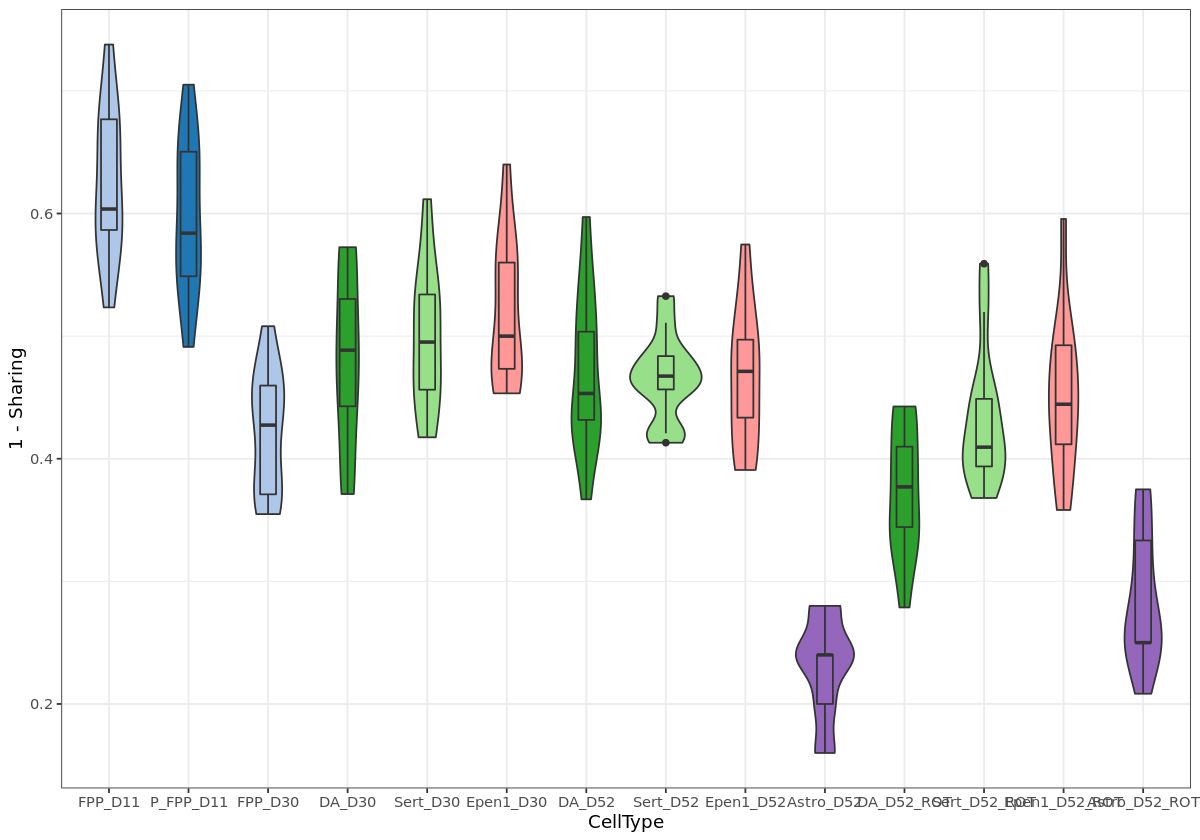

In [26]:
options(repr.plot.width=10, repr.plot.height=7)
ggplot(df,aes(x=CellType, y=1-Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.2) + scale_fill_manual(values = c(col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + theme(legend.position = "none") 

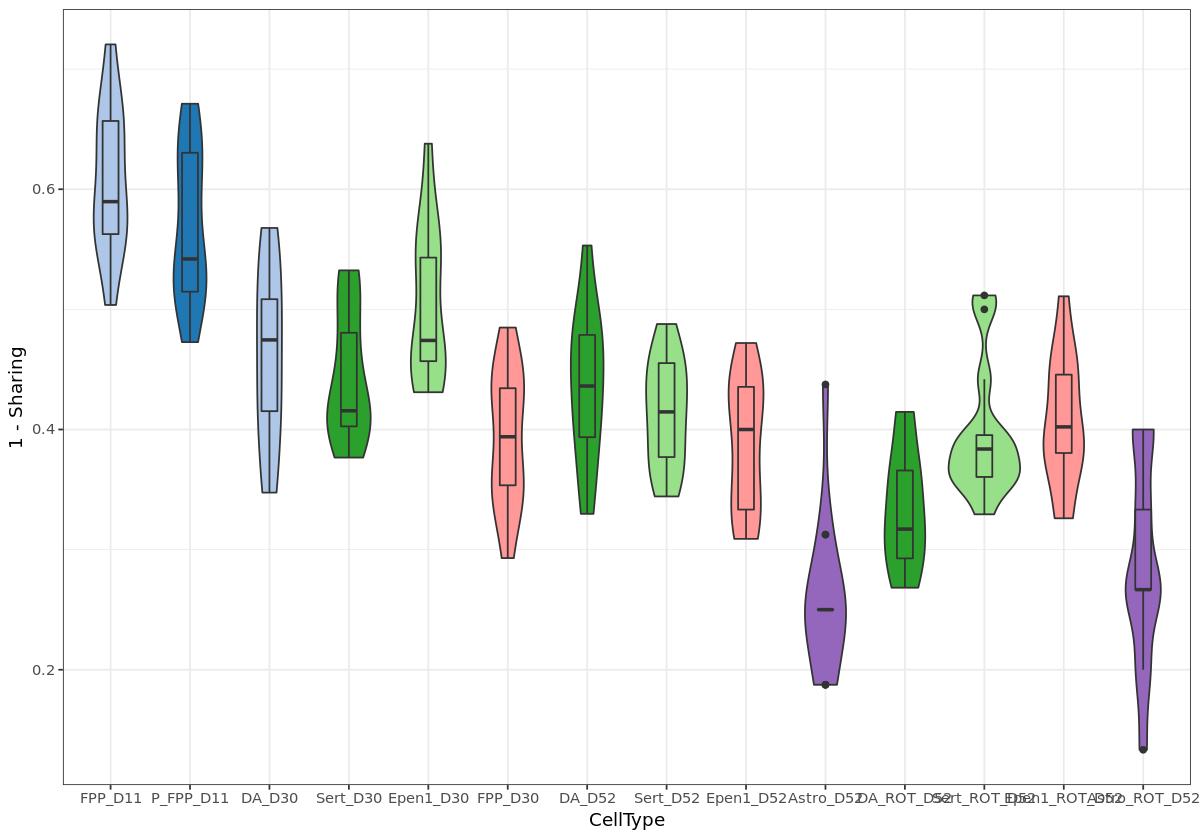

In [84]:
options(repr.plot.width=10, repr.plot.height=7)
ggplot(df,aes(x=CellType, y=1-Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.2) + scale_fill_manual(values = c(col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + theme(legend.position = "none") 